In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [4]:
df  = pd.read_csv("global_energy_2.csv")
df.sort_values(by="Year",ascending = False,inplace = True)

In [5]:
df_India = df[df["Country"]=="India"]
df_Japan = df[df["Country"]=="Japan"]
df_Germany = df[df["Country"]=="Germany"]
df_Russia = df[df["Country"]=="Russia"]
df_Canada = df[df["Country"]=="Canada"]
df_Brazil = df[df["Country"]=="Brazil"]
df_UK = df[df["Country"]=="UK"]
df_China = df[df["Country"]=="China"]
df_Australia  = df[df["Country"]=="Australia"]
df_India.reset_index(inplace=True)

In [6]:
num = len(df["Country"].unique())

/var/folders/2b/qryprngd3152jb0c09zk6zcm0000gn/T/ipykernel_1075/2531753116.py:16: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax1.legend(handles=[plot1,plot2],labels=["Energy_Used","C02"],loc= "upper left" )


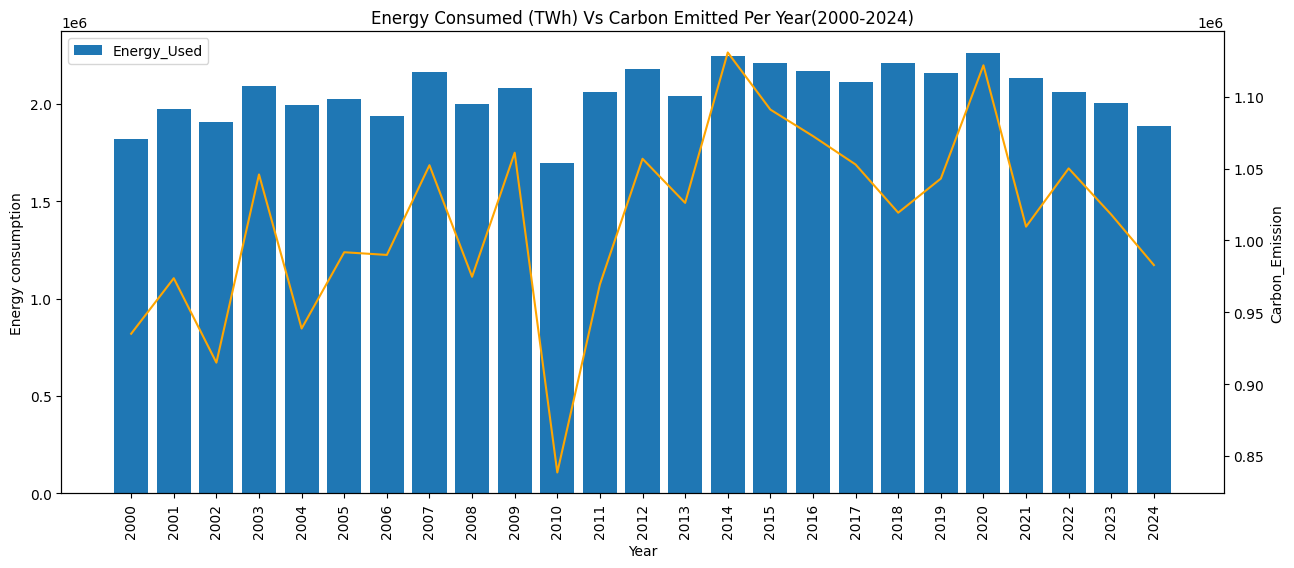

In [20]:
df["Energy Consumed Per Year (TWh)"]=df.groupby(["Year"])["Total Energy Consumption (TWh)"].transform("sum")
carbon_world=df.groupby(["Year"])["Carbon Emissions (Million Tons)"].sum()
carbon_world = pd.DataFrame(carbon_world)
world_energy =df.groupby(["Year"])["Total Energy Consumption (TWh)"].sum()
world_energy = pd.DataFrame(world_energy)
fig,ax1= plt.subplots(figsize= (15,6))
plot1 = ax1.bar(world_energy.index,world_energy["Total Energy Consumption (TWh)"])
ax1.set_xlabel("Year")
ax1.set_ylabel("Energy consumption")
ax1.set_xticks(df["Year"].unique())
plt.xticks(rotation= 90)
ax2 = ax1.twinx()
plot2 = ax2.plot(carbon_world.index,carbon_world["Carbon Emissions (Million Tons)"],color = "orange")
ax2.set_ylabel("Carbon_Emission")
plt.title("Energy Consumed (TWh) Vs Carbon Emitted Per Year(2000-2024)")
ax1.legend(handles=[plot1,plot2],labels=["Energy_Used","C02"],loc= "upper left" )


Text(0.5, 1.0, 'Mean Per Capita Energy Use(kWh) Vs Energy Price(USD/kWh) Per Country')

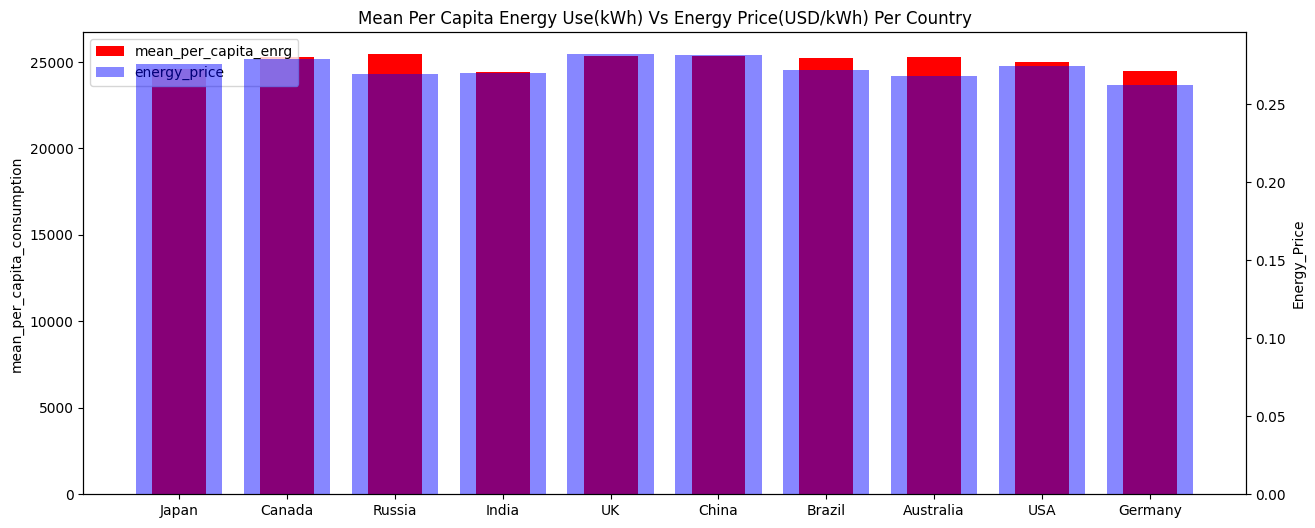

In [8]:

df["per_capita_consumption_mean"]= df.groupby("Country")["Per Capita Energy Use (kWh)"].transform("mean")
df["mean_energy_price_index(USD/kWh)"]= df.groupby(["Country"])["Energy Price Index (USD/kWh)"].transform("mean")
max_PCE= df["per_capita_consumption_mean"].max()
x=np.arange(10)
fig,ax1 = plt.subplots(figsize=(15,6))
bars = ax1.bar(df["Country"].unique(),df["per_capita_consumption_mean"].unique(),color ="red",width=0.5)
ax1.set_ylabel("mean_per_capita_consumption")
ax2= ax1.twinx()
plot = ax2.bar(df["Country"].unique(),df["mean_energy_price_index(USD/kWh)"].unique(),label="enery_price(USD/kWh)",color="blue",alpha=0.47)
ax2.set_ylabel("Energy_Price")
ax1.set_xticks(df["Country"].unique())
ax1.legend(
    handles=[bars,plot],
    labels=["mean_per_capita_enrg","energy_price"],
    loc="upper left"
)
plt.title("Mean Per Capita Energy Use(kWh) Vs Energy Price(USD/kWh) Per Country")



/var/folders/2b/qryprngd3152jb0c09zk6zcm0000gn/T/ipykernel_1075/2364125427.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IEC_mean_data.drop_duplicates(inplace = True)


Text(0.5, 1.0, 'Industrial Energy Consumption Percentage(%) in 2024 ')

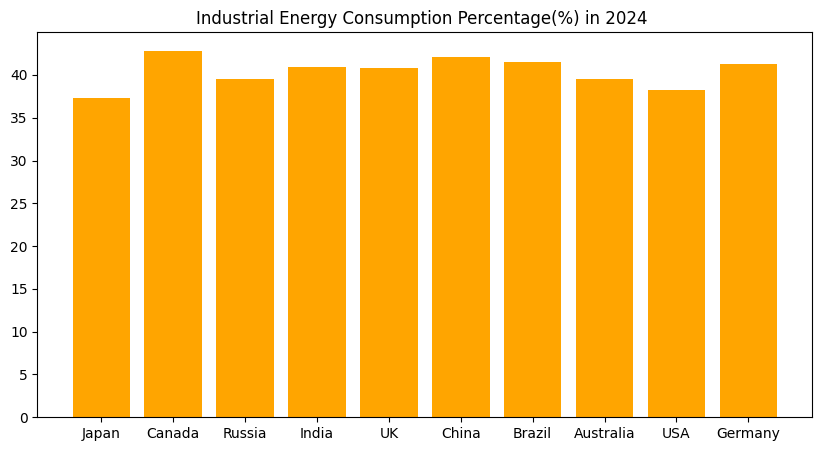

In [9]:
IEC = df.loc[df["Year"]==2024,["Country","Year","Industrial Energy Use (%)"]]

IEC["IEC_mean(%)"] = IEC.groupby(["Country"])["Industrial Energy Use (%)"].transform("mean")
IEC.sample(10)
IEC_mean_data = IEC[["Country","Year","IEC_mean(%)"]]
IEC_mean_data.drop_duplicates(inplace = True)
IEC_mean_data
plt.figure(figsize=(10,5))
plt.bar(IEC_mean_data["Country"],IEC_mean_data["IEC_mean(%)"],color="orange")
plt.title("Industrial Energy Consumption Percentage(%) in 2024 ")


In [10]:
df.sample(10)


,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh),Energy Consumed Per Year (TWh),per_capita_consumption_mean,mean_energy_price_index(USD/kWh)
5567,Australia,2011,2694.73,46008.22,26.13,34.27,52.16,34.53,3687.39,0.13,2061465.08,25286.890891,0.268168
1217,UK,2000,6635.71,3740.45,30.05,18.86,48.52,29.08,1974.68,0.31,1818935.94,25360.567108,0.281992
1296,UK,2019,4013.40,49726.64,37.33,62.46,23.60,10.05,1801.78,0.12,2159271.10,25360.567108,0.281992
5444,Brazil,2019,2551.74,16503.39,27.63,63.00,25.17,39.97,2386.09,0.22,2159271.10,25211.646351,0.271996
9688,Brazil,2004,4444.66,650.20,44.75,36.10,52.25,11.33,3498.30,0.24,1994830.95,25211.646351,0.271996
6937,Canada,2014,4202.05,5510.08,10.55,18.66,47.44,28.38,1829.71,0.48,2247936.24,25269.836618,0.279154
1735,Canada,2003,9800.05,34009.42,86.23,43.88,52.52,23.25,1468.38,0.50,2092794.51,25269.836618,0.279154
8453,Japan,2001,4781.91,43343.06,38.45,38.73,50.27,17.36,4575.47,0.42,1974854.60,24565.916539,0.275755
6910,Australia,2011,5035.05,27633.67,21.80,56.07,59.62,22.64,4657.40,0.39,2061465.08,25286.890891,0.268168
5029,India,2018,4549.42,46677.32,44.45,35.53,56.41,35.38,1725.70,0.20,2212038.50,24438.786255,0.269819


/var/folders/2b/qryprngd3152jb0c09zk6zcm0000gn/T/ipykernel_1075/1064264207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_India["Total_energy_consumption_per_year"]= df_India.groupby(["Year"])["Total Energy Consumption (TWh)"].transform("sum")
/var/folders/2b/qryprngd3152jb0c09zk6zcm0000gn/T/ipykernel_1075/1064264207.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_India["Mean_energy_consumption_percentage_per_year"]= df_India.groupby(["Year"])["Renewable Energy Share (%)"].transform("mean")


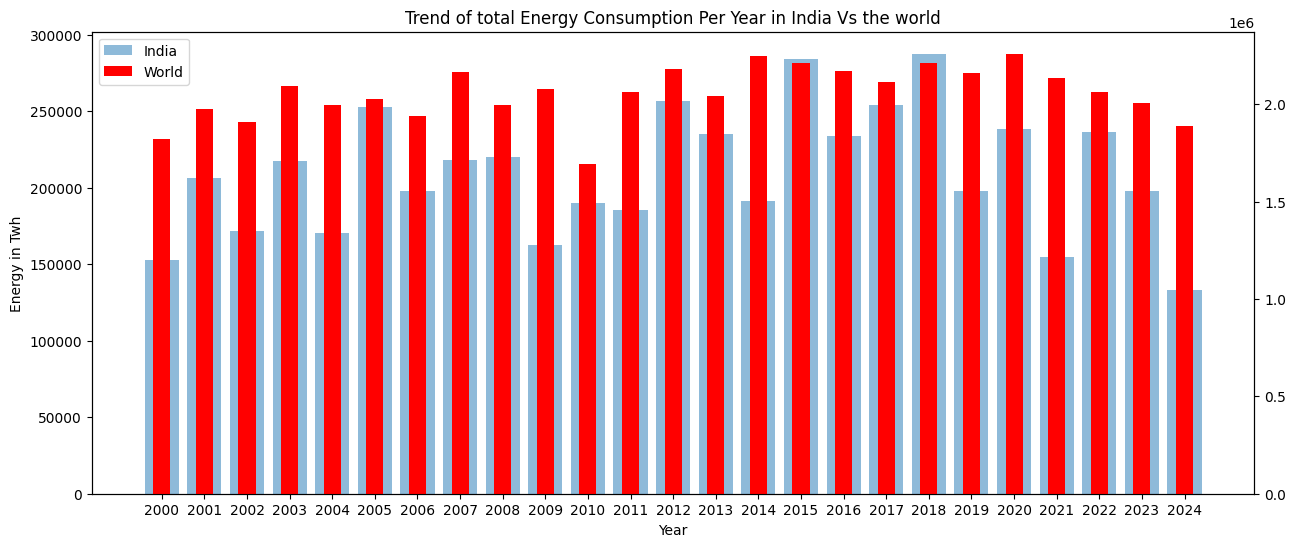

In [11]:
df_India.head()
df_India["Total_energy_consumption_per_year"]= df_India.groupby(["Year"])["Total Energy Consumption (TWh)"].transform("sum")
india_energy=df_India.groupby(["Year"])["Total Energy Consumption (TWh)"].sum()
india_energy = pd.DataFrame(india_energy)
df_India["Mean_energy_consumption_percentage_per_year"]= df_India.groupby(["Year"])["Renewable Energy Share (%)"].transform("mean")
fig,ax1= plt.subplots(figsize=(15,6))
bar = ax1.bar(india_energy.index,india_energy["Total Energy Consumption (TWh)"],alpha=0.5)
ax1.set_xticks(df["Year"].unique())
ax1.set_ylabel("Energy in Twh")
ax1.set_xlabel("Year")
ax2 = ax1.twinx()
bar2 = ax2.bar(world_energy.index,world_energy["Total Energy Consumption (TWh)"],color="red",width=0.4)
plt.xticks(rotation=90)
plt.title("Trend of total Energy Consumption Per Year in India Vs the world")
ax1.legend(handles=[bar,bar2],labels=["India","World"],loc="upper left")

In [12]:
df_India.sample(10)

,index,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh),Total_energy_consumption_per_year,Mean_energy_consumption_percentage_per_year
294,8291,India,2017,4774.62,24835.33,66.37,47.70,50.97,16.31,577.83,0.10,254368.98,49.341176
331,4029,India,2016,7348.95,11764.23,6.11,79.50,55.16,31.99,4273.87,0.27,233566.89,46.777333
148,6576,India,2021,3658.89,572.52,71.58,41.57,33.41,34.20,1497.71,0.40,154450.91,47.291818
938,9783,India,2001,2330.13,31383.01,9.68,77.87,24.57,25.29,2952.94,0.20,206040.13,50.250513
760,627,India,2006,7713.33,19983.71,54.28,68.19,26.74,28.95,3887.00,0.10,197950.01,50.593030
510,468,India,2012,6338.84,49630.63,80.78,73.63,57.18,12.79,3793.47,0.23,256452.81,52.163148
128,8141,India,2021,1184.41,5990.74,17.85,64.17,42.31,30.01,784.88,0.33,154450.91,47.291818
618,4513,India,2010,992.02,6911.54,9.36,14.76,46.58,31.16,2404.53,0.46,189964.52,44.170000
461,2900,India,2014,7627.84,20582.46,44.09,73.23,54.73,33.12,1058.58,0.20,191467.25,42.175676
90,4904,India,2022,9159.05,2669.58,73.60,44.64,59.90,35.90,3113.52,0.13,236272.87,52.014792


In [13]:
india_energy.index 

Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024],
      dtype='int64', name='Year')

In [14]:
world_energy.index

Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024],
      dtype='int64', name='Year')

In [15]:
india_energy["Total Energy Consumption (TWh)"]

Year
2000    152724.84
2001    206040.13
2002    171904.46
2003    217603.39
2004    170632.23
2005    252627.68
2006    197950.01
2007    218175.74
2008    219850.41
2009    162323.00
2010    189964.52
2011    185492.93
2012    256452.81
2013    235311.81
2014    191467.25
2015    284047.95
2016    233566.89
2017    254368.98
2018    287561.33
2019    197525.21
2020    238187.52
2021    154450.91
2022    236272.87
2023    198070.65
2024    133231.14
Name: Total Energy Consumption (TWh), dtype: float64

In [16]:
world_energy["Total Energy Consumption (TWh)"]


Year
2000    1818935.94
2001    1974854.60
2002    1908410.61
2003    2092794.51
2004    1994830.95
2005    2024460.81
2006    1938927.85
2007    2164026.58
2008    1996911.00
2009    2079832.67
2010    1694138.36
2011    2061465.08
2012    2181046.86
2013    2042617.92
2014    2247936.24
2015    2208997.64
2016    2168133.23
2017    2112110.76
2018    2212038.50
2019    2159271.10
2020    2258586.61
2021    2132177.72
2022    2061189.12
2023    2003787.37
2024    1888162.22
Name: Total Energy Consumption (TWh), dtype: float64

In [17]:
india_energy.index

Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024],
      dtype='int64', name='Year')

In [4]:
x = [[0]*3]*3
x[0][0]=1
print(x)

[[1, 0, 0], [1, 0, 0], [1, 0, 0]]
